In [1]:
import matplotlib.pyplot as plt

#boxstyle是文本框的意思 sawtooth是锯齿状，round4是圆角四边形
decisionNode = dict(boxstyle = 'sawtooth', fc = '0.8')
leafNode = dict(boxstyle = 'round4',fc='0.8')
arrow_args = dict(arrowstyle = '<-')

plotNode函数有nodeTxt,centerPt, parentPt, nodeType这四个参数。
- nodeTxt用于记录nodeTxt，即节点的文本信息。
- centerPt表示那个节点框的位置。
- parentPt表示那个箭头的起始位置。
- nodeType表示的是节点的类型

	import matplotlib.pyplot as plt
    # plt.annotate(str, xy=data_point_position, xytext=annotate_position, 
    #              va="center",  ha="center", xycoords="axes fraction", 
    #              textcoords="axes fraction", bbox=annotate_box_type, arrowprops=arrow_style)
    # str是给数据点添加注释的内容，支持输入一个字符串
    # xy=是要添加注释的数据点的位置
    # xytext=是注释内容的位置
    # bbox=是注释框的风格和颜色深度，fc越小，注释框的颜色越深，支持输入一个字典
    # va="center",  ha="center"表示注释的坐标以注释框的正中心为准，而不是注释框的左下角(v代表垂直方向，h代表水平方向)
    # xycoords和textcoords可以指定数据点的坐标系和注释内容的坐标系，通常只需指定xycoords即可，textcoords默认和xycoords相同
    # arrowprops可以指定箭头的风格支持，输入一个字典
    # plt.annotate()的详细参数可用__doc__查看，如：print(plt.annotate.__doc__)

In [2]:
def plotNode(nodeTex,centerPt,parentPt,nodeType):
    creatPlot.ax1.annotate(nodeTex,xy=parentPt,xycoords='axes fraction',xytext=centerPt,\
    textcoords='axes fraction',va='center',ha='center',bbox=nodeType,arrowprops=arrow_args)
    

In [12]:
def primplotNode(nodeTex,centerPt,parentPt,nodeType):
    primcreatePlot.ax1.annotate(nodeTex,xy=parentPt,xycoords='axes fraction',xytext=centerPt,\
    textcoords='axes fraction',va='center',ha='center',bbox=nodeType,arrowprops=arrow_args)

In [13]:
def primcreatePlot():
    fig = plt.figure(1,facecolor='white')
    fig.clf() #使 用其所有轴清除整个当前图形 ，但使窗口保持打开状态，以便可以将其重新用于其他绘图
    primcreatePlot.ax1 = plt.subplot(111,frameon=False)
    primplotNode('decisionNode',(0.5,0.1),(0.1,0.5),decisionNode)
    primplotNode('leafNode',(0.8,0.1),(0.3,0.5),leafNode)
    plt.show()

<IPython.core.display.Javascript object>


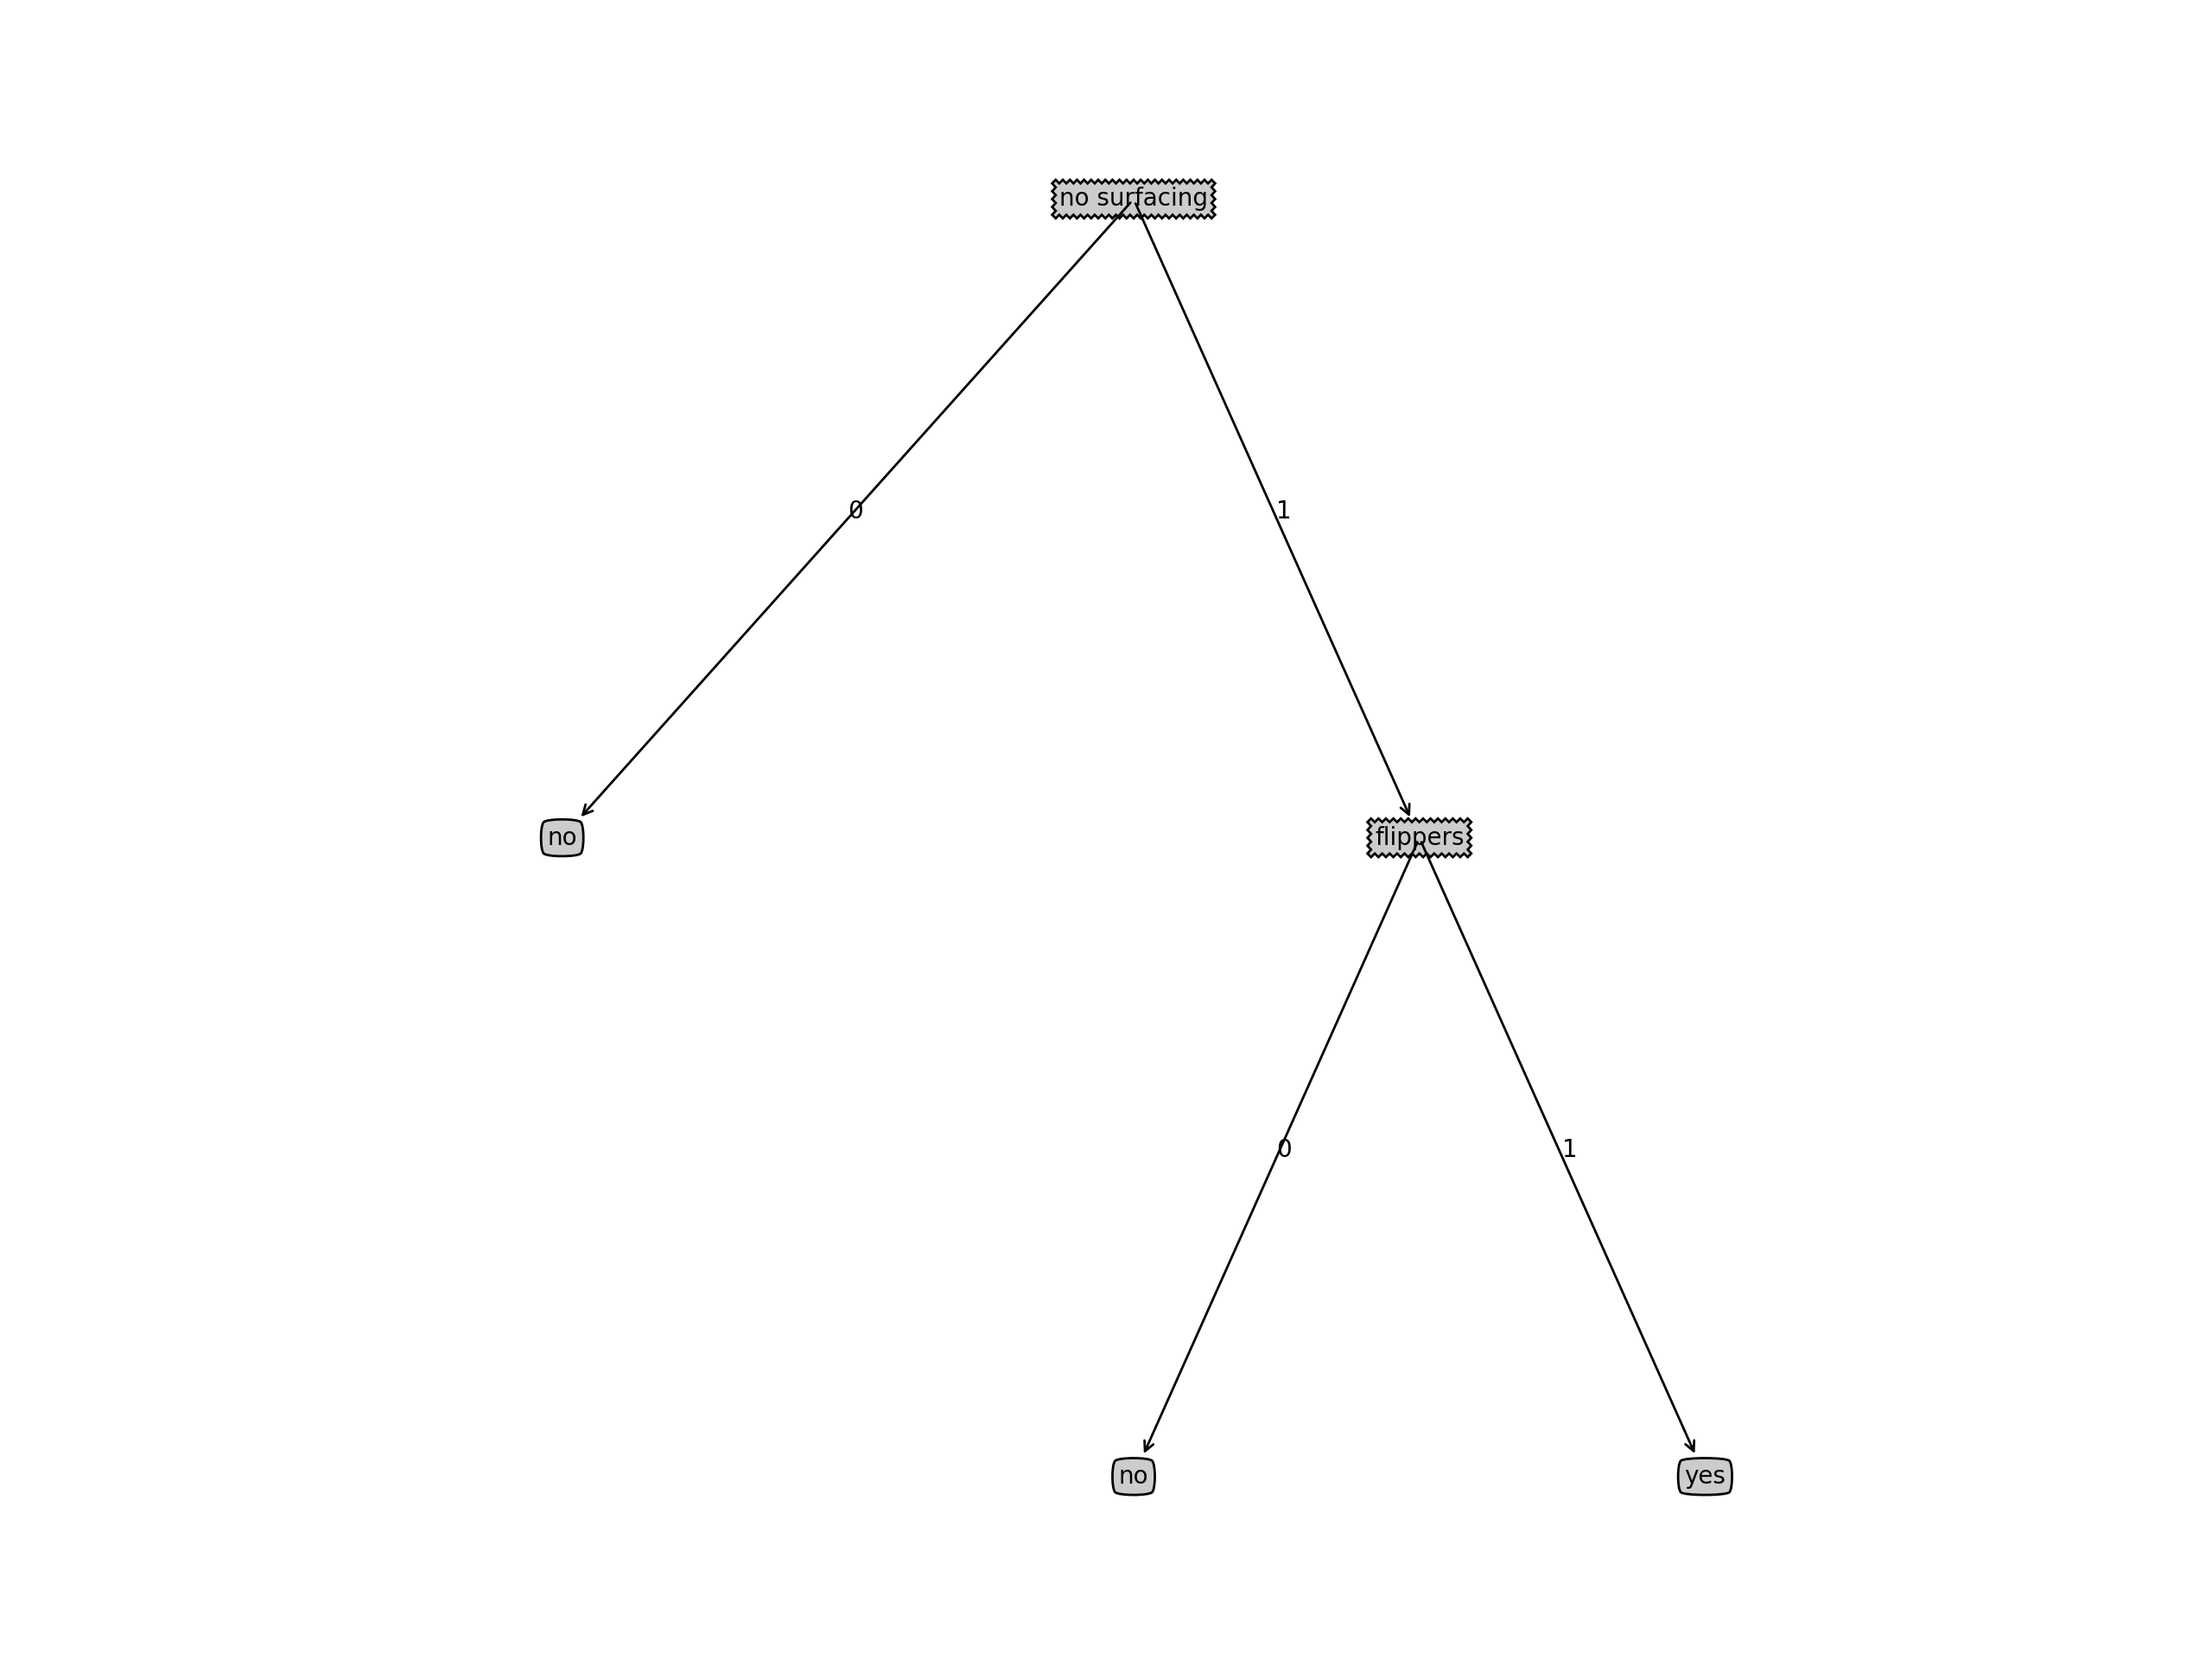

In [16]:
%matplotlib notebook
primcreatePlot()

虽然现在有了x,y坐标 ，但是构建出一棵树还需要数的深度来确定y轴高度，需要知道叶节点的数量来确定x轴的宽度\
**if type(secondDict[key])._name_ == 'dict':** \
Python3中类型对象“ str ”没有“_name_”属性，所以我们需要将属性去掉。除此之外，这句判断的语句本来是判断该节点类型是否为dict（字典），但是因为加上了单引号（‘’），就变成字符串了，这样会产生其他错误，所以我们也需要将单引号去掉

In [7]:
# 获取叶节点数目和树的层数

def getNumLeafs(myTree):
    numLeafs = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr] # 找到第一个关键字，也就是根节点
    for key in secondDict.keys():
        if type(secondDict[key]) == dict: # 如果是dict说明下面还有叶节点，递归调用函数
            numLeafs += getNumLeafs(secondDict[key])
        else: numLeafs += 1 #如果不是dict 说明是叶节点，计数器加一
    return numLeafs

In [8]:
# 获取树的深度

def getTreeDepth(myTree):
    maxDepth = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr] # 找到第一个关键字，也就是根节点
    for key in secondDict.keys():
       # if type(secondDict[key]) == 'dict': # 如果是dict说明还没到叶节点也就是还没到最下面，递归调用函数 
        if type(secondDict[key]) == dict:
            thisDepth = 1 + getTreeDepth(secondDict[key]) # 1加上下面子树的深度
        else: thisDepth = 1 # 说明是叶节点深度为1
        if thisDepth > maxDepth: maxDepth = thisDepth
    return maxDepth
        

In [19]:
# Test
testTree={'no surfacing':{0:'no',1:{'flippers':{0:'no',1:'yes'}}}}
getNumLeafs(testTree),getTreeDepth(testTree)

(3, 2)

In [3]:
# 计算父节点与子节点的中间位置，并添加相应的文本标签信息

def plotMidText(cntrPt,parentPt,txtStr):
    xmid = (parentPt[0] - cntrPt[0])/2.0 + cntrPt[0]
    ymid = (parentPt[1] - cntrPt[1])/2.0 + cntrPt[1]
    creatPlot.ax1.text(xmid,ymid,txtStr)

In [4]:

def plotTree(myTree,parentPt,nodeTxt):
    numLeafs = getNumLeafs(myTree) #获取叶节点数
    depth = getTreeDepth(myTree)  #获取树的深度
    firstStr = list(myTree.keys())[0]  #获取该节点的文本
     # 该节点的水平位置是其子节点的中心
    cntr = (plotTree.xOff + (1.0+float(numLeafs))/2.0/plotTree.totalW,plotTree.yOff)
    plotMidText(cntr,parentPt,nodeTxt)# 绘制箭头及箭头中间的文本
    plotNode(firstStr,cntr,parentPt,decisionNode) #绘制当前节点
    secondDict = myTree[firstStr] #获取子树
    plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD #垂直方向向下移动一格
    for key in secondDict.keys():
        if type(secondDict[key]) == dict: #如果下面不是叶节点，递归调用函数
            plotTree(secondDict[key],cntr,str(key)) 
        else:  #如果是叶节点，先调整x位置再绘制出箭头以及箭头中间文本并绘制出叶节点
            plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW
            plotNode(secondDict[key],(plotTree.xOff,plotTree.yOff),cntr,leafNode)
            plotMidText((plotTree.xOff,plotTree.yOff),cntr,str(key))
    plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD #画完子节点应该在垂直方向上移一格

In [5]:

def creatPlot(inTree):
    fig = plt.figure(1,facecolor='white',figsize=(14,6)) # 设置背景图为白色
    fig.clf()
    axprops = dict(xticks=[],yticks=[])
    creatPlot.ax1 = plt.subplot(111,frameon=False,**axprops)
    # 初始化全局变量
    plotTree.totalW = float(getNumLeafs(inTree))
    plotTree.totalD = float(getTreeDepth(inTree))
    plotTree.xOff = -0.5/plotTree.totalW
    plotTree.yOff = 1.0
    plotTree(inTree,(0.5,1.0),'')
    plt.show()

In [23]:
creatPlot(testTree)

构建决策树是很耗时的任务，所以我们可以先保存决策树，下次要使用的时候再读入

In [24]:
# 用pickle模块存储决策树
def storeTree(inputTree,filename):
    import pickle
    fw = open(filename,'wb')
    pickle.dump(inputTree,fw) # 序列化对象
    fw.close()
    
#读入决策树
def grabTree(filename):
    import pickle
    fr = open(filename,'rb')
    return pickle.load(fr)

In [25]:
myTree = {'no surfaceing': {0: 'n', 1: {'flippers': {0: 'n', 1: 'y'}}}}
storeTree(myTree,'test1.txt')
grabTree('test1.txt')

{'no surfaceing': {0: 'n', 1: {'flippers': {0: 'n', 1: 'y'}}}}

In [42]:
lenseTree={'tearRate': {'normal': {'astigmatic': {'no': {'age': {'presbyopic': {'prescript': {'hyper': 'soft',
        'myope': 'no lenses'}},
      'young': 'soft',
      'pre': 'soft'}},
    'yes': {'prescript': {'hyper': {'age': {'presbyopic': 'no lenses',
        'young': 'hard',
        'pre': 'no lenses'}},
      'myope': 'hard'}}}},
  'reduced': 'no lenses'}}

<IPython.core.display.Javascript object>


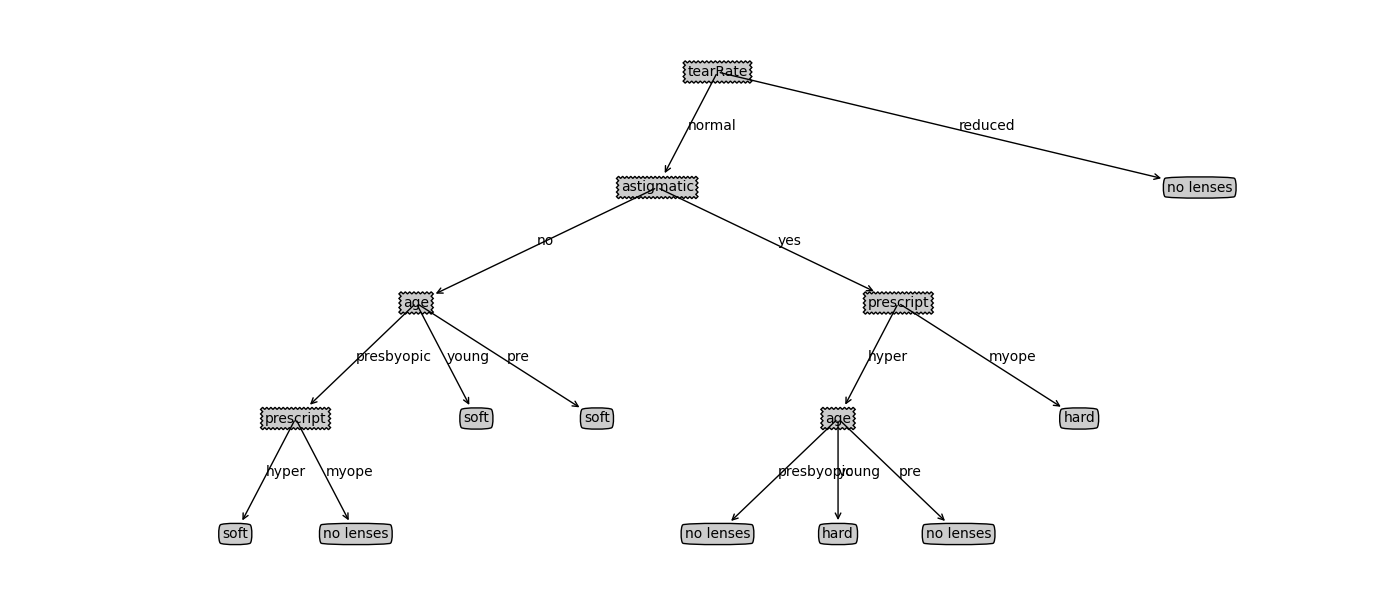

In [43]:
creatPlot(lenseTree)

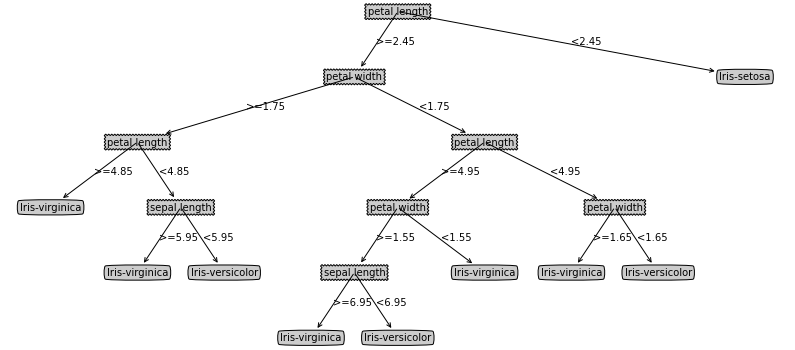

In [10]:
creatPlot({'petal length': {'>=2.45': {'petal width': {'>=1.75': {'petal length': {'>=4.85': 'Iris-virginica',
      '<4.85': {'sepal length': {'>=5.95': 'Iris-virginica',
        '<5.95': 'Iris-versicolor'}}}},
    '<1.75': {'petal length': {'>=4.95': {'petal width': {'>=1.55': {'sepal length': {'>=6.95': 'Iris-virginica',
          '<6.95': 'Iris-versicolor'}},
        '<1.55': 'Iris-virginica'}},
      '<4.95': {'petal width': {'>=1.65': 'Iris-virginica',
        '<1.65': 'Iris-versicolor'}}}}}},
  '<2.45': 'Iris-setosa'}})

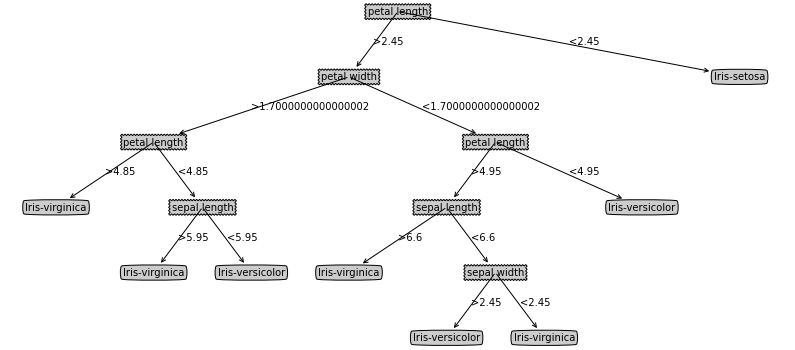

In [11]:
creatPlot({'petal length': {'>2.45': {'petal width': {'>1.7000000000000002': {'petal length': {'>4.85': 'Iris-virginica',
      '<4.85': {'sepal length': {'>5.95': 'Iris-virginica',
        '<5.95': 'Iris-versicolor'}}}},
    '<1.7000000000000002': {'petal length': {'>4.95': {'sepal length': {'>6.6': 'Iris-virginica',
        '<6.6': {'sepal width': {'>2.45': 'Iris-versicolor',
          '<2.45': 'Iris-virginica'}}}},
      '<4.95': 'Iris-versicolor'}}}},
  '<2.45': 'Iris-setosa'}})

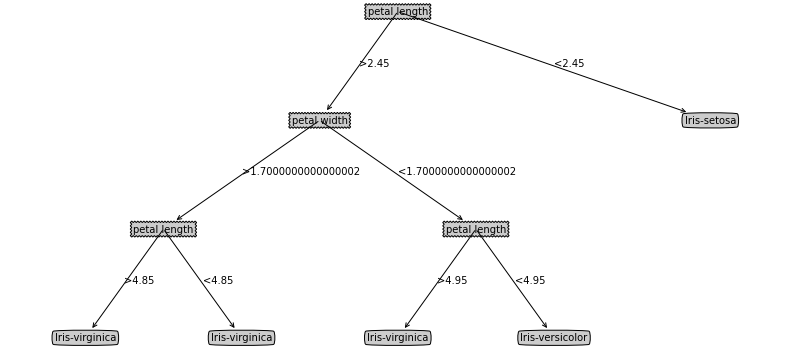

In [12]:
creatPlot({'petal length': {'>2.45': {'petal width': {'>1.7000000000000002': {'petal length': {'>4.85': 'Iris-virginica',
      '<4.85': 'Iris-virginica'}},
    '<1.7000000000000002': {'petal length': {'>4.95': 'Iris-virginica',
      '<4.95': 'Iris-versicolor'}}}},
  '<2.45': 'Iris-setosa'}})